Differential Evolution Globabal Optimisation
============================================

Knowledge 
- https://en.wikipedia.org/wiki/Differential_evolution

Basic example with rosenbrock
-----------------------------

In [82]:
from scipy.optimize import rosen, differential_evolution
bounds = [(0,2), (0, 2)]
result = differential_evolution(rosen, bounds)
result.x, result.fun


(array([ 1.,  1.]), 0.0)

In [5]:
import sys
sys.path.insert(0, '../')
import random

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.optimize import differential_evolution, minimize, Bounds
from scipy.interpolate import interp1d

from silentsub.device import StimulationDevice
from silentsub.plotting import stim_plot
from silentsub.CIE import get_CIES026

sns.set_context('notebook')
sns.set_style('whitegrid')


Load the data with `StimulationDevice`
--------------------------------------

In [6]:
spds = pd.read_csv('../data/S2_corrected_oo_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))

# list of colors for the primaries
colors = ['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 
          'green', 'lime', 'orange', 'red', 'darkred']

# instantiate the class
device = StimulationDevice(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1)

Define optimisation problem
---------------------------

This is the 'basic' optimisation where we aim to maximise melanopic contrast whilst keeping cone contrast at zero.

In [24]:
class OptimisationProblem:
    def __init__(self, aopic):
        self.aopic = aopic

    def smlri_calculator(self, weights):
        '''Calculates a-opic irradiance for the given weights.
        The first 10 values in weights define the background
        spectrum and the second 10 values define the modulation'''
        background = weights[0:10]
        modulation = weights[10:20]
        bg_smlri = 0
        mod_smlri = 0
        for led in range(10):
            x = self.aopic.loc[led].index / 4095
            y = self.aopic.loc[led]
            f = interp1d(x, y, axis=0, fill_value='extrapolate')
            bg_smlri += f(background[led])
            mod_smlri += f(modulation[led])
        return (pd.Series(bg_smlri, index=self.aopic.columns, name='Background'),
                pd.Series(mod_smlri, index=self.aopic.columns, name='Modulation'))

    def objective_function(self, weights):
        '''Calculates negative melanopsin contrast for background
        and modulation spectra. We want to minimise this.'''
        bg_smlri, mod_smlri = self.smlri_calculator(weights)
        contrast = (mod_smlri.I-bg_smlri.I) / bg_smlri.I
        return -contrast

    def cone_contrast_constraint_function(self, weights):
        '''Calculates S-, M-, and L-opic contrast for background
        and modulation spectra. We want to this to be zero'''
        bg_smlri, mod_smlri = self.smlri_calculator(weights)
        contrast = np.array([(mod_smlri.S-bg_smlri.S) / bg_smlri.S,
                             (mod_smlri.M-bg_smlri.M) / bg_smlri.M,
                             (mod_smlri.L-bg_smlri.L) / bg_smlri.L])
        return contrast

    def weights_to_settings(self, weights):
        '''Turns weights to 12-bit STLAB settings.'''
        return ([int(val*4095) for val in res.x[0:10]],
                [int(val*4095) for val in res.x[10:20]])



Do optimisation
---------------

differential_evolution step 1: f(x)= -1.2041


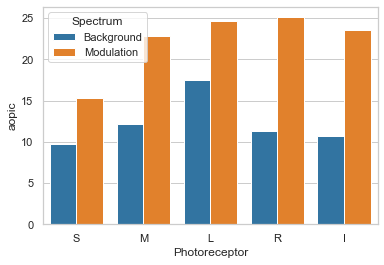

[  4.39552126e-01   6.13935314e-01   1.09374328e-02   4.40510076e-01
   8.26275762e-04   3.95811957e-01   1.47834659e-01   4.75836707e-01
   8.94097983e-01   6.68524399e-01   5.86282758e-01   4.82624724e-01
   7.33929241e-01   7.02435338e-01   1.36873896e-01   8.55817044e-01
   6.54735881e-01   1.16152837e-01   8.85701453e-01   5.97975505e-01]
differential_evolution step 2: f(x)= -1.41072


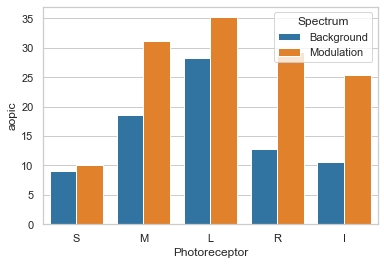

[ 0.27793948  0.86017593  0.01817372  0.09929922  0.0139375   0.29663207
  0.41101093  0.88642118  0.87819703  0.67796553  0.38013162  0.06312679
  0.27931239  0.78928225  0.78811901  0.8418248   0.86872269  0.40315438
  0.71346827  0.57639012]
differential_evolution step 3: f(x)= -1.41072


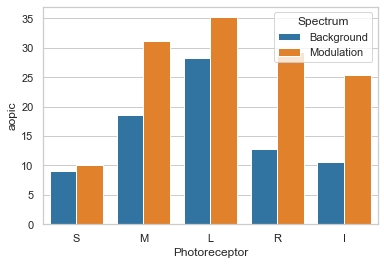

[ 0.27793948  0.86017593  0.01817372  0.09929922  0.0139375   0.29663207
  0.41101093  0.88642118  0.87819703  0.67796553  0.38013162  0.06312679
  0.27931239  0.78928225  0.78811901  0.8418248   0.86872269  0.40315438
  0.71346827  0.57639012]
differential_evolution step 4: f(x)= -1.48325


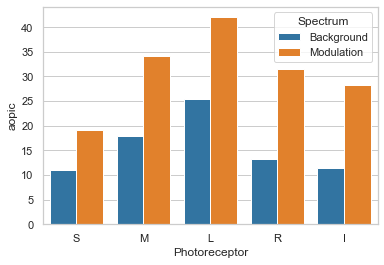

[ 0.99880149  0.69747583  0.01604161  0.09889015  0.20165782  0.06223381
  0.44283455  0.81180905  0.42500341  0.17351533  0.72388633  0.97344884
  0.87912559  0.45466258  0.19139903  0.97976996  0.87178847  0.76864792
  0.91199973  0.93249301]
differential_evolution step 5: f(x)= -1.48325


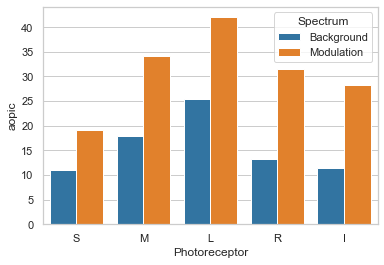

[ 0.99880149  0.69747583  0.01604161  0.09889015  0.20165782  0.06223381
  0.44283455  0.81180905  0.42500341  0.17351533  0.72388633  0.97344884
  0.87912559  0.45466258  0.19139903  0.97976996  0.87178847  0.76864792
  0.91199973  0.93249301]
differential_evolution step 6: f(x)= -1.62212


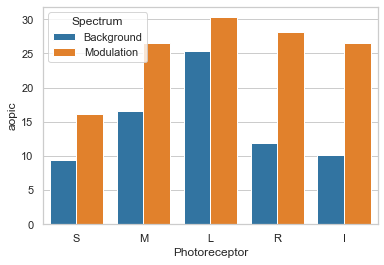

[ 0.2621504   0.89350084  0.02013347  0.10650409  0.06043975  0.29928103
  0.22727981  0.91701624  0.56043038  0.805767    0.37429114  0.49224176
  0.88534592  0.86821342  0.47494842  0.57801491  0.65075053  0.40599312
  0.75849919  0.66539527]
differential_evolution step 7: f(x)= -1.92863


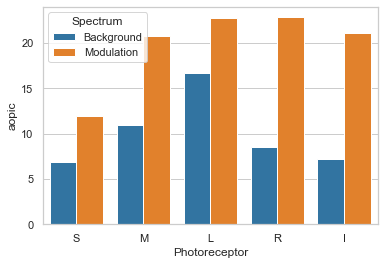

[  7.16847340e-01   3.25044049e-01   1.49992624e-02   4.68507965e-02
   4.47202292e-04   4.61589291e-01   1.25587792e-01   4.79731964e-01
   8.70445736e-01   7.13432367e-01   6.64316010e-01   3.76301345e-01
   2.09419082e-01   6.13002133e-01   7.22019388e-01   7.96814731e-01
   2.78993682e-01   3.28102152e-01   9.37955260e-01   2.25878557e-01]
differential_evolution step 8: f(x)= -1.92863


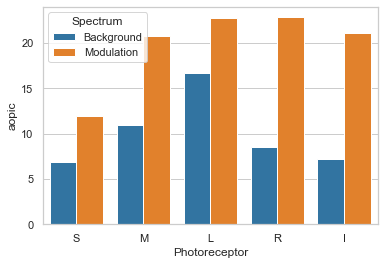

[  7.16847340e-01   3.25044049e-01   1.49992624e-02   4.68507965e-02
   4.47202292e-04   4.61589291e-01   1.25587792e-01   4.79731964e-01
   8.70445736e-01   7.13432367e-01   6.64316010e-01   3.76301345e-01
   2.09419082e-01   6.13002133e-01   7.22019388e-01   7.96814731e-01
   2.78993682e-01   3.28102152e-01   9.37955260e-01   2.25878557e-01]
differential_evolution step 9: f(x)= -1.92863


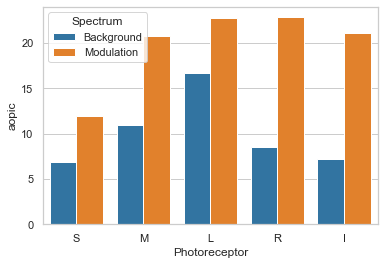

[  7.16847340e-01   3.25044049e-01   1.49992624e-02   4.68507965e-02
   4.47202292e-04   4.61589291e-01   1.25587792e-01   4.79731964e-01
   8.70445736e-01   7.13432367e-01   6.64316010e-01   3.76301345e-01
   2.09419082e-01   6.13002133e-01   7.22019388e-01   7.96814731e-01
   2.78993682e-01   3.28102152e-01   9.37955260e-01   2.25878557e-01]
differential_evolution step 10: f(x)= -1.92863


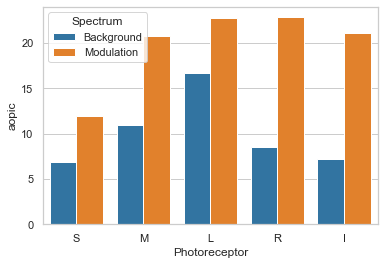

[  7.16847340e-01   3.25044049e-01   1.49992624e-02   4.68507965e-02
   4.47202292e-04   4.61589291e-01   1.25587792e-01   4.79731964e-01
   8.70445736e-01   7.13432367e-01   6.64316010e-01   3.76301345e-01
   2.09419082e-01   6.13002133e-01   7.22019388e-01   7.96814731e-01
   2.78993682e-01   3.28102152e-01   9.37955260e-01   2.25878557e-01]
differential_evolution step 11: f(x)= -1.92863


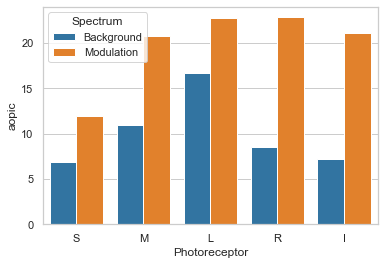

[  7.16847340e-01   3.25044049e-01   1.49992624e-02   4.68507965e-02
   4.47202292e-04   4.61589291e-01   1.25587792e-01   4.79731964e-01
   8.70445736e-01   7.13432367e-01   6.64316010e-01   3.76301345e-01
   2.09419082e-01   6.13002133e-01   7.22019388e-01   7.96814731e-01
   2.78993682e-01   3.28102152e-01   9.37955260e-01   2.25878557e-01]
differential_evolution step 12: f(x)= -1.92863


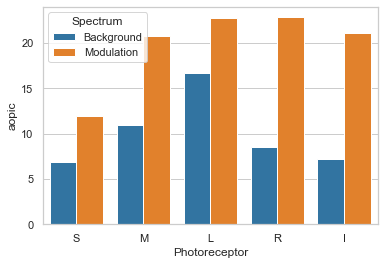

[  7.16847340e-01   3.25044049e-01   1.49992624e-02   4.68507965e-02
   4.47202292e-04   4.61589291e-01   1.25587792e-01   4.79731964e-01
   8.70445736e-01   7.13432367e-01   6.64316010e-01   3.76301345e-01
   2.09419082e-01   6.13002133e-01   7.22019388e-01   7.96814731e-01
   2.78993682e-01   3.28102152e-01   9.37955260e-01   2.25878557e-01]
differential_evolution step 13: f(x)= -1.95259


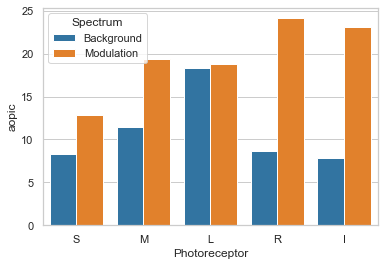

[ 0.55155927  0.42865213  0.15004738  0.12719271  0.00539015  0.06960059
  0.23359923  0.60440298  0.55839089  0.70399802  0.55692549  0.4200144
  0.34891462  0.63605826  0.97190086  0.80826879  0.15410278  0.20362086
  0.40620507  0.46935341]
differential_evolution step 14: f(x)= -1.95259


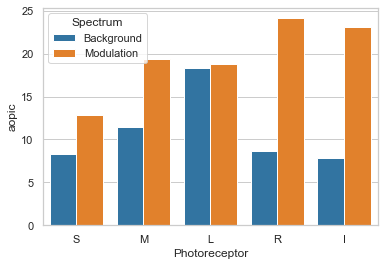

[ 0.55155927  0.42865213  0.15004738  0.12719271  0.00539015  0.06960059
  0.23359923  0.60440298  0.55839089  0.70399802  0.55692549  0.4200144
  0.34891462  0.63605826  0.97190086  0.80826879  0.15410278  0.20362086
  0.40620507  0.46935341]
differential_evolution step 15: f(x)= -1.95259


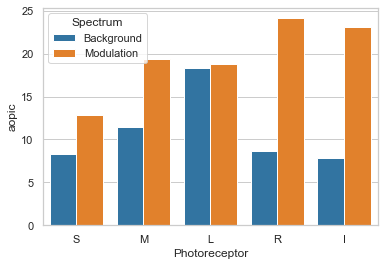

[ 0.55155927  0.42865213  0.15004738  0.12719271  0.00539015  0.06960059
  0.23359923  0.60440298  0.55839089  0.70399802  0.55692549  0.4200144
  0.34891462  0.63605826  0.97190086  0.80826879  0.15410278  0.20362086
  0.40620507  0.46935341]
differential_evolution step 16: f(x)= -1.95259


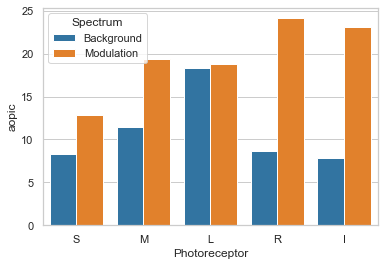

[ 0.55155927  0.42865213  0.15004738  0.12719271  0.00539015  0.06960059
  0.23359923  0.60440298  0.55839089  0.70399802  0.55692549  0.4200144
  0.34891462  0.63605826  0.97190086  0.80826879  0.15410278  0.20362086
  0.40620507  0.46935341]
differential_evolution step 17: f(x)= -2.6602


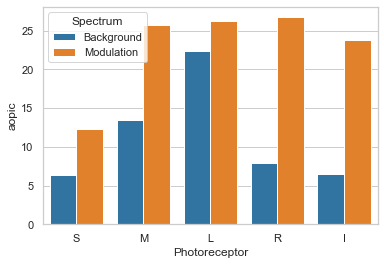

[ 0.71278174  0.09787139  0.14361342  0.07743192  0.05935071  0.06701215
  0.14522066  0.96651428  0.46339829  0.35079733  0.25765435  0.79604351
  0.17458646  0.4084359   0.95781685  0.63219844  0.73171852  0.17897206
  0.41534383  0.01170623]
differential_evolution step 18: f(x)= -2.6602


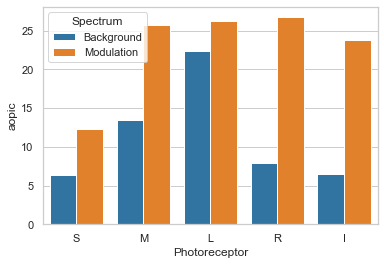

[ 0.71278174  0.09787139  0.14361342  0.07743192  0.05935071  0.06701215
  0.14522066  0.96651428  0.46339829  0.35079733  0.25765435  0.79604351
  0.17458646  0.4084359   0.95781685  0.63219844  0.73171852  0.17897206
  0.41534383  0.01170623]
differential_evolution step 19: f(x)= -2.6602


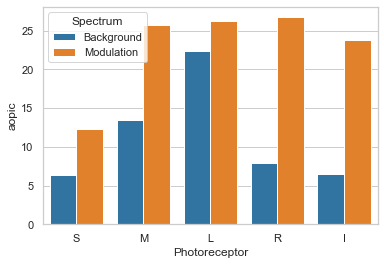

[ 0.71278174  0.09787139  0.14361342  0.07743192  0.05935071  0.06701215
  0.14522066  0.96651428  0.46339829  0.35079733  0.25765435  0.79604351
  0.17458646  0.4084359   0.95781685  0.63219844  0.73171852  0.17897206
  0.41534383  0.01170623]
differential_evolution step 20: f(x)= -2.6602


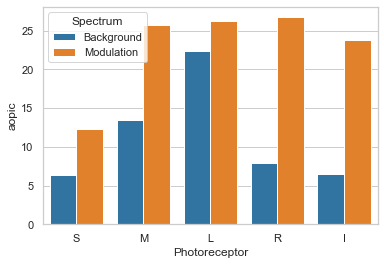

[ 0.71278174  0.09787139  0.14361342  0.07743192  0.05935071  0.06701215
  0.14522066  0.96651428  0.46339829  0.35079733  0.25765435  0.79604351
  0.17458646  0.4084359   0.95781685  0.63219844  0.73171852  0.17897206
  0.41534383  0.01170623]
differential_evolution step 21: f(x)= -2.6602


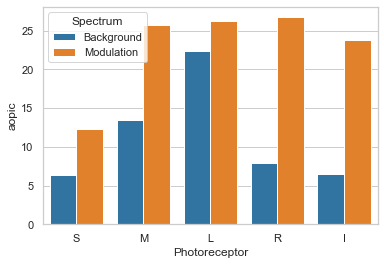

[ 0.71278174  0.09787139  0.14361342  0.07743192  0.05935071  0.06701215
  0.14522066  0.96651428  0.46339829  0.35079733  0.25765435  0.79604351
  0.17458646  0.4084359   0.95781685  0.63219844  0.73171852  0.17897206
  0.41534383  0.01170623]


KeyboardInterrupt: 

In [94]:
from scipy.optimize import NonlinearConstraint

# A random starting point for the optimisation
x0 = np.random.rand(1, 20)[0] 

# Set up problem
op = OptimisationProblem(device.aopic)

# Requires the special constraint format
c = NonlinearConstraint(fun=lambda x: op.cone_contrast_constraint_function(x), 
                        lb=0, ub=1)

# The bounds should be between 0-1, otherwise we are outside the
# gamut of the device
bounds = [(0, 1.),] * 20

# Plotting func for call back
def plot_solution(background, modulation):
    df = (
        pd.concat([background, modulation], axis=1)
        .T.melt(
            value_name='aopic',
            var_name='Photoreceptor',
            ignore_index=False)
        .reset_index()
        .rename(
            columns={'index': 'Spectrum'})
         )
    fig = sns.barplot(data=df, x='Photoreceptor', y='aopic', hue='Spectrum')
    plt.show()
    
# Callback function to give info on all minima found 
def print_fun(xk, convergence=0):
    bg, mod = op.smlri_calculator(xk)
    plot_solution(bg, mod)
    print(xk)

# Do Shgo
differential_evolution(
    func=op.objective_function,
    bounds=bounds,
    args=(),
    strategy='best1bin',
    maxiter=1000,
    popsize=15,
    tol=0.01,
    mutation=(0.5, 1),
    recombination=0.7,
    seed=None,
    callback=print_fun,
    disp=True,
    polish=True,
    init='latinhypercube',
    atol=0,
    updating='immediate',
    workers=1,
    constraints=c,
    x0=x0,
)